a estimé: 1.6281744018461304, c estimé: 1.522808043827688, sigma estimé: 59.23744409287302
Optimisation réussie: True | message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Résidus - moyenne, écart-type: 0.0039840818168683035 0.999995425222045


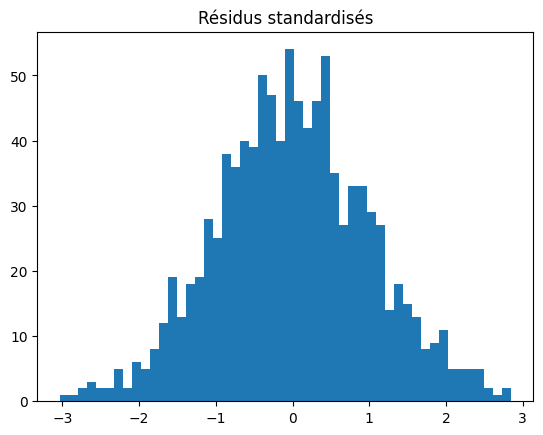

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Paramètres vrais pour la simulation
c_vrai = 1.5
a_vrai = 2.0
sigma_vrai = 60
np.random.seed(0)

temps = np.linspace(100, 1000, 1000)
delta_t = temps[1] - temps[0]
# Delta en t^c pour la simulation utilise le c vrai
delta_t_c_sim = temps[1:]**c_vrai - temps[:-1]**c_vrai

# Simuler les incréments: scale = sqrt(variance) = sigma * sqrt(delta_t)
delta_x = np.random.normal(loc=a_vrai * delta_t_c_sim, scale=sigma_vrai * np.sqrt(delta_t))

def log_vraisemblance_neg(parametres, delta_x, temps, delta_t):
    a, c, sigma = parametres
    if sigma <= 0 or c <= 0:
        return np.inf
    # Recalculer delta_t_c pour le c candidat
    delta_t_c = temps[1:]**c - temps[:-1]**c
    variance = (sigma**2) * delta_t
    residu = delta_x - a * delta_t_c
    # Log-vraisemblance négative vectorisée
    lv_neg = 0.5 * np.sum(np.log(2 * np.pi * variance) + (residu**2) / variance)
    return lv_neg

hypothese_init = [1.0, 1.0, 10.0]
bornes = [(None, None), (1e-6, None), (1e-6, None)]
resultat = minimize(log_vraisemblance_neg, hypothese_init, args=(delta_x, temps, delta_t), bounds=bornes, method='L-BFGS-B')
a_estime, c_estime, sigma_estime = resultat.x
print(f"a estimé: {a_estime}, c estimé: {c_estime}, sigma estimé: {sigma_estime}")
print('Optimisation réussie:', resultat.success, '| message:', resultat.message)

# Diagnostiques
delta_t_c_estime = temps[1:]**c_estime - temps[:-1]**c_estime
residu_std = (delta_x - a_estime * delta_t_c_estime) / (sigma_estime * np.sqrt(delta_t))
print('Résidus - moyenne, écart-type:', np.mean(residu_std), np.std(residu_std))

# Graphique optionnel (décommenter si désiré)
plt.hist(residu_std, bins=50); plt.title('Résidus standardisés')
plt.show()